<a href="https://colab.research.google.com/github/ahmedyasser7/DEPI_GP/blob/main/Mapping_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DRIVER & CAR INVOLOVMENT IN THE ACCIDENT PREDICTIVE MODEL**  

# Uploading The Dataset

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Vechicles cleaned data.csv to Vechicles cleaned data.csv


#Importing Libraries

In [2]:
# Importing the necessary Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Data

In [4]:
# Load the 'Vechicles cleaned data.csv' dataset
df = pd.read_csv('Vechicles cleaned data.csv')
df

,Accident_Index,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200901BS70001,2,1,15,1,77,26
1,200901BS70001,9,1,15,1,31,2
2,200901BS70002,19,1,1,1,40,3
3,200901BS70002,11,1,1,1,38,1
4,200901BS70003,3,1,15,1,40,2
...,...,...,...,...,...,...,...
1640699,2014984138414,9,1,2,1,27,12
1640700,2014984138414,19,1,2,1,44,4
1640701,2014984138414,9,1,6,1,73,7
1640702,2014984139614,11,1,1,1,40,4


#Exploring & Preprocessing the Data

In [5]:
# Check the first few rows
df.head()

,Accident_Index,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200901BS70001,2,1,15,1,77,26
1,200901BS70001,9,1,15,1,31,2
2,200901BS70002,19,1,1,1,40,3
3,200901BS70002,11,1,1,1,38,1
4,200901BS70003,3,1,15,1,40,2


In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640704 entries, 0 to 1640703
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Accident_Index                1640704 non-null  object
 1   Vehicle_Type                  1640704 non-null  int64 
 2   Was_Vehicle_Left_Hand_Drive?  1640704 non-null  int64 
 3   Journey_Purpose_of_Driver     1640704 non-null  int64 
 4   Sex_of_Driver                 1640704 non-null  int64 
 5   Age_of_Driver                 1640704 non-null  int64 
 6   Age_of_Vehicle                1640704 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 87.6+ MB


In [7]:
df.describe()

,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
count,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06
mean,9.551219e+00,1.004265e+00,7.035593e+00,1.405757e+00,3.927871e+01,7.458439e+00
std,8.388348e+00,6.516478e-02,5.052299e+00,5.992807e-01,1.515689e+01,3.945962e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.800000e+01,5.000000e+00
50%,9.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00
75%,9.000000e+00,1.000000e+00,1.500000e+01,2.000000e+00,4.800000e+01,9.000000e+00
max,9.800000e+01,2.000000e+00,1.500000e+01,3.000000e+00,1.000000e+02,1.110000e+02


In [8]:
df.shape

(1640704, 7)

In [9]:
# Check for missing values
df.isnull().sum()

,0
Accident_Index,0
Vehicle_Type,0
Was_Vehicle_Left_Hand_Drive?,0
Journey_Purpose_of_Driver,0
Sex_of_Driver,0
Age_of_Driver,0
Age_of_Vehicle,0


In [10]:
# Check for duplicate values
df.duplicated().sum()

3113

In [11]:
# Check for duplicates in each column
duplicate_columns = df.apply(lambda col: col.duplicated().sum())

# Print columns with duplicates
duplicate_columns[duplicate_columns > 0]

,0
Accident_Index,742233
Vehicle_Type,1640684
Was_Vehicle_Left_Hand_Drive?,1640702
Journey_Purpose_of_Driver,1640697
Sex_of_Driver,1640701
Age_of_Driver,1640604
Age_of_Vehicle,1640613


In [12]:
# Handling Duplicate Values
df = df.drop_duplicates(keep = 'last')
df.shape

(1637591, 7)

In [13]:
df['Was_Vehicle_Left_Hand_Drive?'].value_counts()

,count
Was_Vehicle_Left_Hand_Drive?,
1,1630600
2,6991


In [14]:
df['Age_of_Driver'].value_counts()

,count
Age_of_Driver,
38,204965
30,42958
25,38053
20,37953
40,37730
...,...
97,20
2,18
99,16


In [15]:
df['Age_of_Vehicle'].value_counts()

,count
Age_of_Vehicle,
7,532274
8,94211
9,93118
6,91829
10,89363
...,...
99,1
67,1
100,1


## Create the target variable

In [16]:
# Create the target variable 'Accident_Occurred'
df['Accident_involved'] = ((df['Was_Vehicle_Left_Hand_Drive?'] == 2) |
                               ((df['Age_of_Driver'] >= 38) & (df['Age_of_Vehicle'] >= 6))).astype(int)


<ipython-input-16-d4e34f37b5da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accident_involved'] = ((df['Was_Vehicle_Left_Hand_Drive?'] == 2) |


In [17]:
df

,Accident_Index,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Accident_involved
0,200901BS70001,2,1,15,1,77,26,1
1,200901BS70001,9,1,15,1,31,2,0
2,200901BS70002,19,1,1,1,40,3,0
3,200901BS70002,11,1,1,1,38,1,0
4,200901BS70003,3,1,15,1,40,2,0
...,...,...,...,...,...,...,...,...
1640699,2014984138414,9,1,2,1,27,12,0
1640700,2014984138414,19,1,2,1,44,4,0
1640701,2014984138414,9,1,6,1,73,7,1
1640702,2014984139614,11,1,1,1,40,4,0


In [18]:
df['Accident_involved'].value_counts()

,count
Accident_involved,
0,972133
1,665458


# Model Selection & Training

## Train-Test Split

In [19]:
# Define features (X) and target variable (y)
X = df[['Was_Vehicle_Left_Hand_Drive?', 'Age_of_Driver', 'Age_of_Vehicle']]
y = df['Accident_involved']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Apply Undersampling

In [20]:
# Apply undersampling to balance the classes in the training set
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Check the distribution of classes after undersampling
print(f"Class distribution before undersampling: {Counter(y_train)}")
print(f"Class distribution after undersampling: {Counter(y_train_under)}")


Class distribution before undersampling: Counter({0: 777663, 1: 532409})
Class distribution after undersampling: Counter({0: 532409, 1: 532409})


##Train the Model

In [21]:
# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, class_weight={0: 1, 1: 2})

# Train the model using the undersampled data
log_reg.fit(X_train_under, y_train_under)


LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=2000)

## Evaluate the Model

In [22]:
# Evaluate the model on the test data
score = log_reg.score(X_test, y_test)
print(f"Accuracy of Logistic Regression: {score:.2f}")

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Convert predictions to labels
y_pred_labels = ['Involved' if pred == 1 else 'Not Involved' for pred in y_pred]


Accuracy of Logistic Regression: 0.83


## Visualize Confusion Matrix

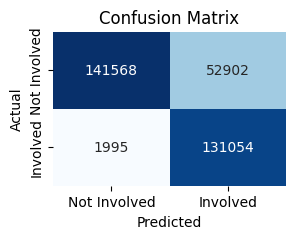


Classification Report:
              precision    recall  f1-score   support

Not Involved       0.99      0.73      0.84    194470
    Involved       0.71      0.99      0.83    133049

    accuracy                           0.83    327519
   macro avg       0.85      0.86      0.83    327519
weighted avg       0.87      0.83      0.83    327519



In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Involved', 'Involved'],
            yticklabels=['Not Involved', 'Involved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Involved', 'Involved']))


# Save Model

In [25]:
import pickle
# Save the model to a file
model_filename = 'Mapping_Model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(log_reg, file)

#Load & Predict


In [27]:
import pickle

# Load the model from the file
model_filename = 'Mapping_Model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Ask the user for input values
print("Please enter the following details:")
was_vehicle_left_hand_drive = int(input("Was the vehicle left hand drive? (0 for No, 1 for Yes): "))
age_of_driver = int(input("Age of Driver: "))
age_of_vehicle = int(input("Age of Vehicle: "))

# Prepare the input for prediction (make sure the input is in the same format as your training data)
user_input = [[was_vehicle_left_hand_drive, age_of_driver, age_of_vehicle]]

# Make the prediction
prediction = loaded_model.predict(user_input)

# Convert the prediction to labels
prediction_label = 'Involved' if prediction[0] == 1 else 'Not Involved'

# Display the result
print(f"\nPrediction: {prediction_label}")


Please enter the following details:
Was the vehicle left hand drive? (0 for No, 1 for Yes): 0
Age of Driver: 28
Age of Vehicle: 8

Prediction: Not Involved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
